<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Запрос" data-toc-modified-id="Запрос-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Запрос</a></span></li><li><span><a href="#Проверка-данных" data-toc-modified-id="Проверка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-всех-данных" data-toc-modified-id="Изучение-всех-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение всех данных</a></span></li><li><span><a href="#Проверим-дубликаты:**" data-toc-modified-id="Проверим-дубликаты:**-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверим дубликаты:**</a></span></li><li><span><a href="#Просмотр-записей" data-toc-modified-id="Просмотр-записей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Просмотр записей</a></span></li><li><span><a href="#Проверка-столбцов--'item_topic','source_topic','age_segment'" data-toc-modified-id="Проверка-столбцов--'item_topic','source_topic','age_segment'-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка столбцов  'item_topic','source_topic','age_segment'</a></span></li><li><span><a href="#Проверка-по-дате" data-toc-modified-id="Проверка-по-дате-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка по дате</a></span></li><li><span><a href="#Проверка-по-посещениям" data-toc-modified-id="Проверка-по-посещениям-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Проверка по посещениям</a></span></li></ul></li><li><span><a href="#Экспорт-данных-в-csv-файл" data-toc-modified-id="Экспорт-данных-в-csv-файл-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Экспорт данных в csv-файл</a></span></li></ul></div>

# Запрос к базе данных и сохранение обработаной информации в csv-файл для построения дашборда 

## Описание проекта
Я работаю аналитиком в Яндекс.Дзене. Мне необходимо проанализировать и автоматизировать свою работу по карточкам статей с разными темами. 
Обсудив данный проект с менеджерами, мы составили ТЗ, в котором указывалось, что необходимо построить дашборд, но прежде мы проанализируем полученные данные и составим запрос. 

## Запрос 
Дашборд основывается на пайплане, который будет брать данные из таблицы, в которых хранятся сырые данные, трансформировать данные и укладывать их в агрегирующую таблицу. Пайплайн разработан для дата-инженерами.

***Сделаем запрос и сохраним в переменной "dash_visits"***

In [4]:
#!/usr/bin/python
# -*- coding: utf-8 -*-


# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

query = ''' SELECT *
            FROM dash_visits
        '''

dash_visits = pd.io.sql.read_sql(query, con = engine)


In [4]:
dash_visits

record_id item_topic source_topic age_segment                  dt  \
0        1040597     Деньги         Авто       18-25 2019-09-24 18:32:00   
1        1040598     Деньги         Авто       18-25 2019-09-24 18:35:00   
2        1040599     Деньги         Авто       18-25 2019-09-24 18:54:00   
3        1040600     Деньги         Авто       18-25 2019-09-24 18:55:00   
4        1040601     Деньги         Авто       18-25 2019-09-24 18:56:00   
...          ...        ...          ...         ...                 ...   
30740    1071337       Юмор      Финансы       36-40 2019-09-24 18:57:00   
30741    1071338       Юмор      Финансы       36-40 2019-09-24 19:00:00   
30742    1071339       Юмор      Финансы       41-45 2019-09-24 18:54:00   
30743    1071340       Юмор      Финансы       41-45 2019-09-24 18:56:00   
30744    1071341       Юмор      Финансы       41-45 2019-09-24 19:00:00   

       visits  
0           3  
1           1  
2           4  
3          17  
4          27  
...       ...  
30740       2  
30741       1  
30742       1  
30743       1  
30744       1  

[30745 rows x 6 columns]

## Проверка данных 
1. Изучим полученные данные
2. Проверим на дубликаты
3. Просмотрим сами записи

### Изучение всех данных

In [5]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
record_id       30745 non-null int64
item_topic      30745 non-null object
source_topic    30745 non-null object
age_segment     30745 non-null object
dt              30745 non-null datetime64[ns]
visits          30745 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


***Данные целостные и с типами всё в порядке.***

### Проверим дубликаты:**

In [7]:
dash_visits.duplicated().sum()

0

***Дубликатов нет.***

**Теперь быстро проверим каждый столбец**

### Просмотр записей

In [5]:
dash_visits['record_id'].describe()

count    3.074500e+04
mean     1.055969e+06
std      8.875461e+03
min      1.040597e+06
25%      1.048283e+06
50%      1.055969e+06
75%      1.063655e+06
max      1.071341e+06
Name: record_id, dtype: float64

In [6]:
dash_visits['record_id'].nunique()

30745

***Все идентификаторы уникальны - кол-во уникальных 'record_id' равно кол-ву строк 30745.***

### Проверка столбцов  'item_topic','source_topic','age_segment' 

In [12]:
for column in ['item_topic','source_topic','age_segment']:
    print(dash_visits[column].value_counts())

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64
Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              12

Изучив данные, видим, что у нас есть множество разных тем, и аудитория поделена на возрастные категории: 
- 18-25   кол-во 7056
- 26-30    кол-во 5875
- 31-35   кол-во  5552
- 36-40    кол-во 5105
- 41-45  кол-во   3903
- 45+    кол-во   3254

### Проверка по дате

In [16]:
dash_visits['dt'].describe()

count                   30745
unique                     17
top       2019-09-24 18:58:00
freq                     3383
first     2019-09-24 18:28:00
last      2019-09-24 19:00:00
Name: dt, dtype: object

In [22]:
dash_visits['dt'].sort_values().unique()

array(['2019-09-24T18:28:00.000000000', '2019-09-24T18:29:00.000000000',
       '2019-09-24T18:30:00.000000000', '2019-09-24T18:31:00.000000000',
       '2019-09-24T18:32:00.000000000', '2019-09-24T18:33:00.000000000',
       '2019-09-24T18:34:00.000000000', '2019-09-24T18:35:00.000000000',
       '2019-09-24T18:52:00.000000000', '2019-09-24T18:53:00.000000000',
       '2019-09-24T18:54:00.000000000', '2019-09-24T18:55:00.000000000',
       '2019-09-24T18:56:00.000000000', '2019-09-24T18:57:00.000000000',
       '2019-09-24T18:58:00.000000000', '2019-09-24T18:59:00.000000000',
       '2019-09-24T19:00:00.000000000'], dtype='datetime64[ns]')

***Здесь все хорошо. Всего 17 значений интересно...***

### Проверка по посещениям

In [12]:
dash_visits

record_id item_topic source_topic age_segment                  dt  \
0        1040597     Деньги         Авто       18-25 2019-09-24 18:32:00   
1        1040598     Деньги         Авто       18-25 2019-09-24 18:35:00   
2        1040599     Деньги         Авто       18-25 2019-09-24 18:54:00   
3        1040600     Деньги         Авто       18-25 2019-09-24 18:55:00   
4        1040601     Деньги         Авто       18-25 2019-09-24 18:56:00   
...          ...        ...          ...         ...                 ...   
30740    1071337       Юмор      Финансы       36-40 2019-09-24 18:57:00   
30741    1071338       Юмор      Финансы       36-40 2019-09-24 19:00:00   
30742    1071339       Юмор      Финансы       41-45 2019-09-24 18:54:00   
30743    1071340       Юмор      Финансы       41-45 2019-09-24 18:56:00   
30744    1071341       Юмор      Финансы       41-45 2019-09-24 19:00:00   

       visits  
0           3  
1           1  
2           4  
3          17  
4          27  
...       ...  
30740       2  
30741       1  
30742       1  
30743       1  
30744       1  

[30745 rows x 6 columns]

In [34]:
dash_visits['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

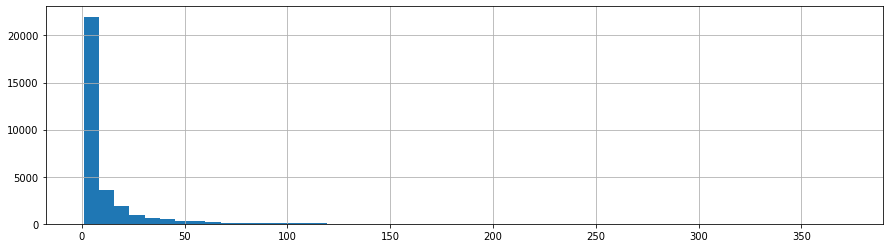

In [35]:
dash_visits['visits'].hist(bins=50, figsize=(15,4));

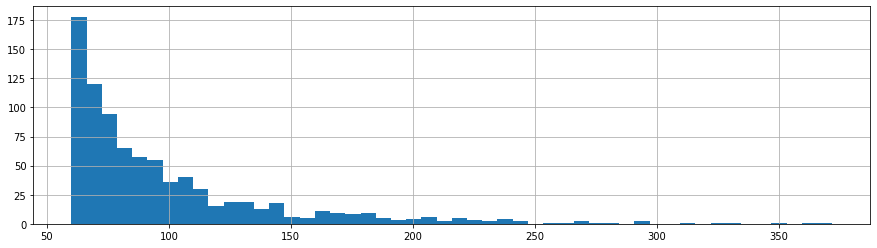

In [36]:
dash_visits['visits'].hist(bins=50, figsize=(15,4), range=(60,372));

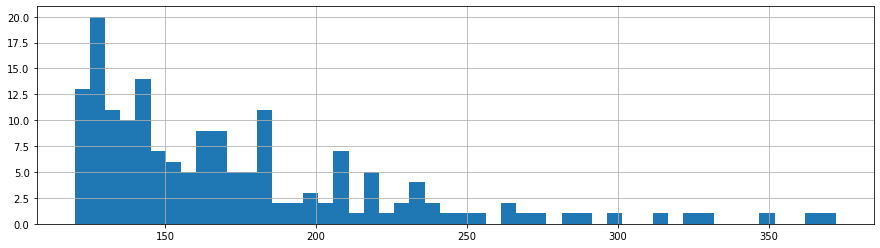

In [37]:
dash_visits['visits'].hist(bins=50, figsize=(15,4), range=(120,372));

Выбросы имеются, но трогать их не будем. Большая часть посещений приходится на значения от 1 жо 25. 


## Экспорт данных в csv-файл

In [7]:
dash_visits.to_csv('dash_visits.csv', index=False)

In [8]:
test_visits = pd.read_csv('dash_visits.csv')
test_visits

record_id item_topic source_topic age_segment                   dt  \
0        1040597     Деньги         Авто       18-25  2019-09-24 18:32:00   
1        1040598     Деньги         Авто       18-25  2019-09-24 18:35:00   
2        1040599     Деньги         Авто       18-25  2019-09-24 18:54:00   
3        1040600     Деньги         Авто       18-25  2019-09-24 18:55:00   
4        1040601     Деньги         Авто       18-25  2019-09-24 18:56:00   
...          ...        ...          ...         ...                  ...   
30740    1071337       Юмор      Финансы       36-40  2019-09-24 18:57:00   
30741    1071338       Юмор      Финансы       36-40  2019-09-24 19:00:00   
30742    1071339       Юмор      Финансы       41-45  2019-09-24 18:54:00   
30743    1071340       Юмор      Финансы       41-45  2019-09-24 18:56:00   
30744    1071341       Юмор      Финансы       41-45  2019-09-24 19:00:00   

       visits  
0           3  
1           1  
2           4  
3          17  
4          27  
...       ...  
30740       2  
30741       1  
30742       1  
30743       1  
30744       1  

[30745 rows x 6 columns]

Данные экспортированы в файл - 'dash_visits.csv'.***